In [403]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import matplotlib

from scipy import interpolate

from windrose import WindroseAxes

In [404]:
def convtime(x):
    x=x.removesuffix(':00+00:00')
    x=x.replace('T',' ')
    return x

In [405]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [406]:
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"

In [407]:
metmast=pd.read_csv('../1-input/4-metmast-training.csv', sep=';')

metmast

metmast['Timestamp']=metmast['Timestamp'].apply( lambda x:convtime(x))

metmast['Timestamp'] = pd.to_datetime(metmast['Timestamp'])

metmast

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0,0.0499,0.24,1,0,0,600,98,99,418
1,2016-01-01 00:10:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0,0.0499,0.24,1,0,0,600,99,101,418
2,2016-01-01 00:20:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0,0.0499,0.24,1,0,0,600,111,113,418
3,2016-01-01 00:30:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0,0.0499,0.24,1,0,0,600,122,125,418
4,2016-01-01 00:40:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0,0.0499,0.24,1,0,0,600,121,123,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69956,2017-08-31 23:20:00,2.7,6.1,4.4,0.40,2.8,6.3,4.4,0.40,115.0,...,0,0.0499,0.24,1,0,0,600,85,85,407
69957,2017-08-31 23:30:00,3.3,6.1,4.7,0.45,3.4,5.6,4.6,0.30,116.0,...,0,0.0499,0.24,1,0,0,600,90,88,407
69958,2017-08-31 23:40:00,2.6,6.0,4.0,0.94,2.7,5.2,3.8,0.51,110.0,...,0,0.0499,0.24,1,0,0,600,78,73,407
69959,2017-08-31 23:50:00,3.3,6.9,5.4,0.61,3.4,6.5,5.1,0.45,97.0,...,0,0.0499,0.24,1,0,0,600,105,98,407


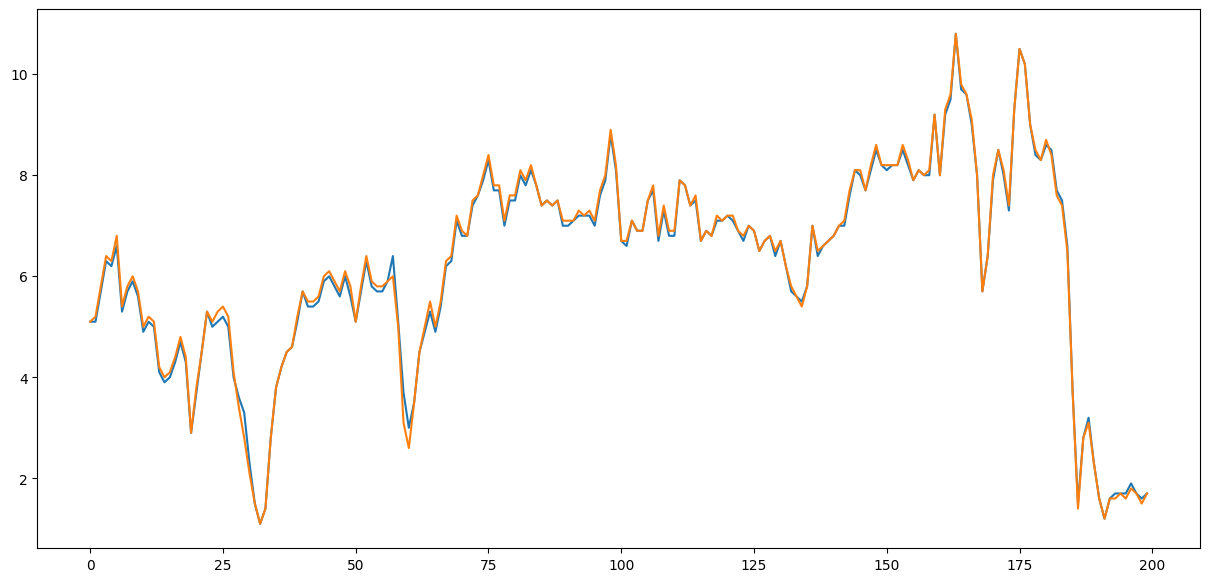

In [408]:
plt.figure(figsize=(15,7))
values=metmast.Avg_Windspeed1[:200]
values2=metmast.Avg_Windspeed2[:200]
# use the plot function
plt.plot(values)
plt.plot(values2)

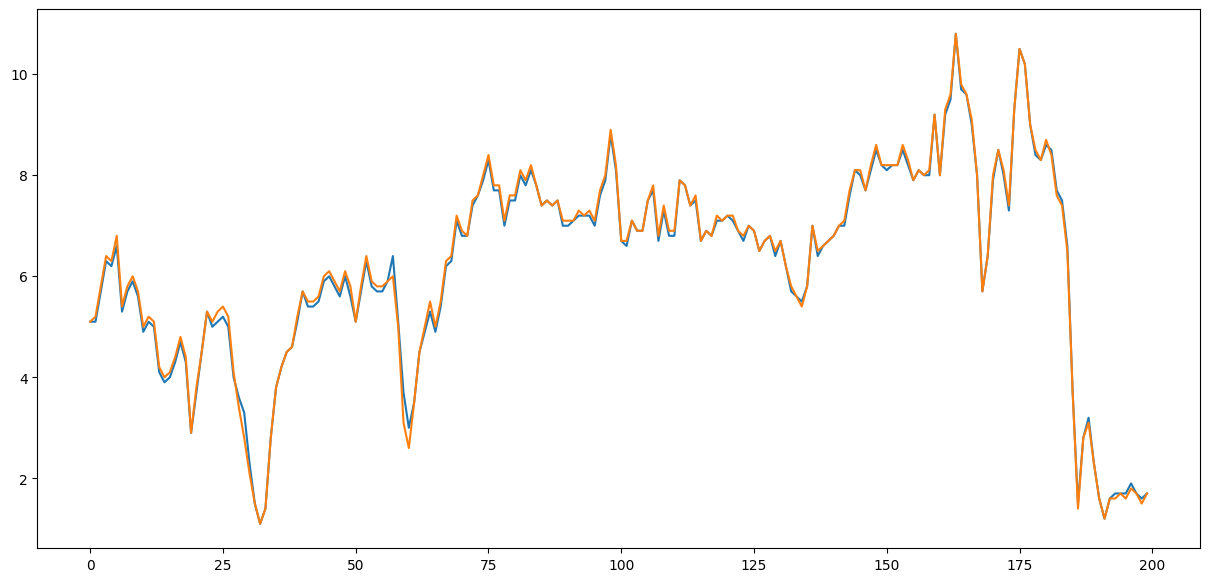

In [409]:
plt.figure(figsize=(15,7))
values=metmast.Avg_Windspeed1[:200]
values2=metmast.Avg_Windspeed2[:200]
# use the plot function
plt.plot(values)
plt.plot(values2)

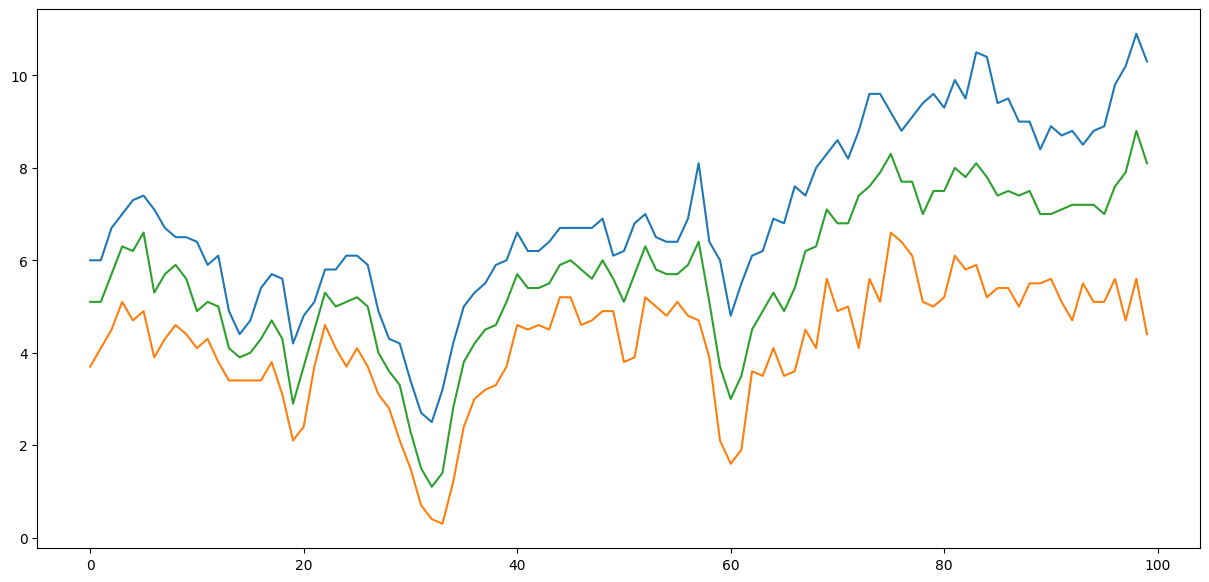

In [410]:
plt.figure(figsize=(15,7))
values=metmast.Max_Windspeed1[:100]
values2=metmast.Min_Windspeed1[:100]
values3=metmast.Avg_Windspeed1[:100]
# use the plot function
plt.plot(values)
plt.plot(values2)
plt.plot(values3)

In [411]:
metmast.describe().T

,count,mean,std,min,25%,50%,75%,max
Min_Windspeed1,69960.0,4.245343,2.654873e+00,0.0000,2.3000,3.7000,5.8000,17.8000
Max_Windspeed1,69961.0,8.413618,4.808946e+00,0.0000,4.7000,7.5000,11.3000,30.8000
Avg_Windspeed1,69960.0,6.338668,3.733035e+00,0.0000,3.5000,5.6000,8.5000,23.1000
Var_Windspeed1,69960.0,0.926280,1.213568e+00,0.0000,0.1500,0.4800,1.1900,35.1000
Min_Windspeed2,69960.0,4.341732,2.796495e+00,0.0000,2.2000,3.8000,6.0000,17.3000
Max_Windspeed2,69961.0,8.317262,4.693258e+00,0.0000,4.7000,7.5000,11.2000,29.0000
Avg_Windspeed2,69960.0,6.338642,3.740070e+00,0.0000,3.5000,5.6000,8.6000,22.9000
Var_Windspeed2,69960.0,0.807165,9.985055e-01,0.0000,0.1500,0.4700,1.0600,35.9300
Min_Winddirection2,69960.0,232.267953,2.458751e+01,0.0000,236.0000,236.0000,236.0000,358.0000
Max_Winddirection2,69961.0,233.634939,1.868413e+01,0.0000,236.0000,236.0000,236.0000,357.0000


In [412]:
metmast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69961 entries, 0 to 69960
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   69961 non-null  datetime64[ns]
 1   Min_Windspeed1              69960 non-null  float64       
 2   Max_Windspeed1              69961 non-null  float64       
 3   Avg_Windspeed1              69960 non-null  float64       
 4   Var_Windspeed1              69960 non-null  float64       
 5   Min_Windspeed2              69960 non-null  float64       
 6   Max_Windspeed2              69961 non-null  float64       
 7   Avg_Windspeed2              69960 non-null  float64       
 8   Var_Windspeed2              69960 non-null  float64       
 9   Min_Winddirection2          69960 non-null  float64       
 10  Max_Winddirection2          69961 non-null  int64         
 11  Avg_Winddirection2          69960 non-null  float64   

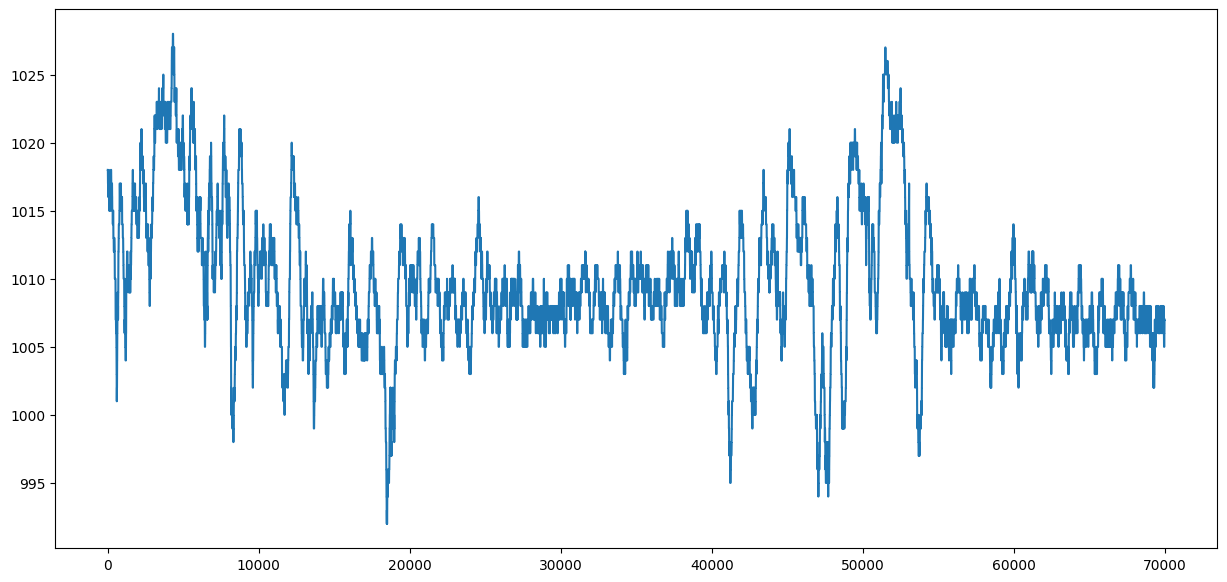

In [413]:
plt.figure(figsize=(15,7))
values=metmast.Avg_Pressure
# use the plot function
plt.plot(values)

In [414]:
signals=pd.read_csv('../1-input/5-signals-training.csv', sep=';')

signals

signals['Timestamp']=signals['Timestamp'].apply( lambda x:convtime(x))

metmast['Timestamp'] = pd.to_datetime(metmast['Timestamp'])

In [415]:
T1sig=signals.loc[(signals['Turbine_ID']=='T01')]

T1sig

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
2,T01,2016-01-01 00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
8,T01,2016-01-01 00:10,1268.3,93.3,999.7,435.9,41.0,58,59,59,...,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37,218.5
13,T01,2016-01-01 00:20,1394.4,220.3,774.0,486.1,41.0,57,57,57,...,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37,213.3
15,T01,2016-01-01 00:30,1306.6,1212.4,1257.1,17.0,40.0,56,57,57,...,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36,222.4
21,T01,2016-01-01 00:40,1320.9,1224.1,1257.7,18.0,40.0,57,58,57,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36,222.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434121,T01,2017-08-31 23:20,1279.2,1226.6,1249.4,9.5,43.0,59,60,59,...,-512.8,0.0,-1000.0,308.7,512.8,1000.0,0.0,308.7,42,120.9
434129,T01,2017-08-31 23:30,1277.0,1224.9,1249.2,10.1,43.0,61,61,61,...,-448.6,0.0,-1000.0,255.6,448.6,1000.0,0.0,255.6,43,115.7
434131,T01,2017-08-31 23:40,1269.5,1237.2,1249.2,5.2,44.0,62,62,62,...,-337.8,0.0,-952.8,318.8,337.8,952.8,0.0,318.8,43,112.8
434137,T01,2017-08-31 23:50,1267.3,1230.6,1249.7,7.5,45.0,63,63,63,...,-436.2,-9.6,-927.5,204.7,436.2,927.5,9.6,204.7,43,107.6


In [416]:
T1sig.describe().T

,count,mean,std,min,25%,50%,75%,max
Gen_RPM_Max,87146.0,1156.935136,655.679623,0.0,283.9,1419.10,1681.100,1923.2
Gen_RPM_Min,87146.0,904.457654,621.736058,0.0,171.0,1231.80,1357.200,1666.8
Gen_RPM_Avg,87146.0,1033.338027,628.509320,0.0,241.3,1276.60,1585.000,1683.5
Gen_RPM_Std,87146.0,67.528754,110.412141,0.0,14.2,27.90,70.500,823.1
Gen_Bear_Temp_Avg,87145.0,45.986654,16.228424,18.0,34.0,43.00,56.000,93.0
...,...,...,...,...,...,...,...,...
Grd_Prod_PsbleCap_Max,87146.0,646.302172,445.826206,0.0,0.0,1000.00,1000.000,1000.0
Grd_Prod_PsbleCap_Min,87146.0,312.328429,350.585507,0.0,0.0,215.15,479.975,1000.0
Grd_Prod_PsbleCap_Std,87146.0,80.548855,99.780223,0.0,0.0,26.60,151.175,497.8
Gen_Bear2_Temp_Avg,87146.0,44.132949,14.703886,20.0,32.0,42.00,54.000,85.0


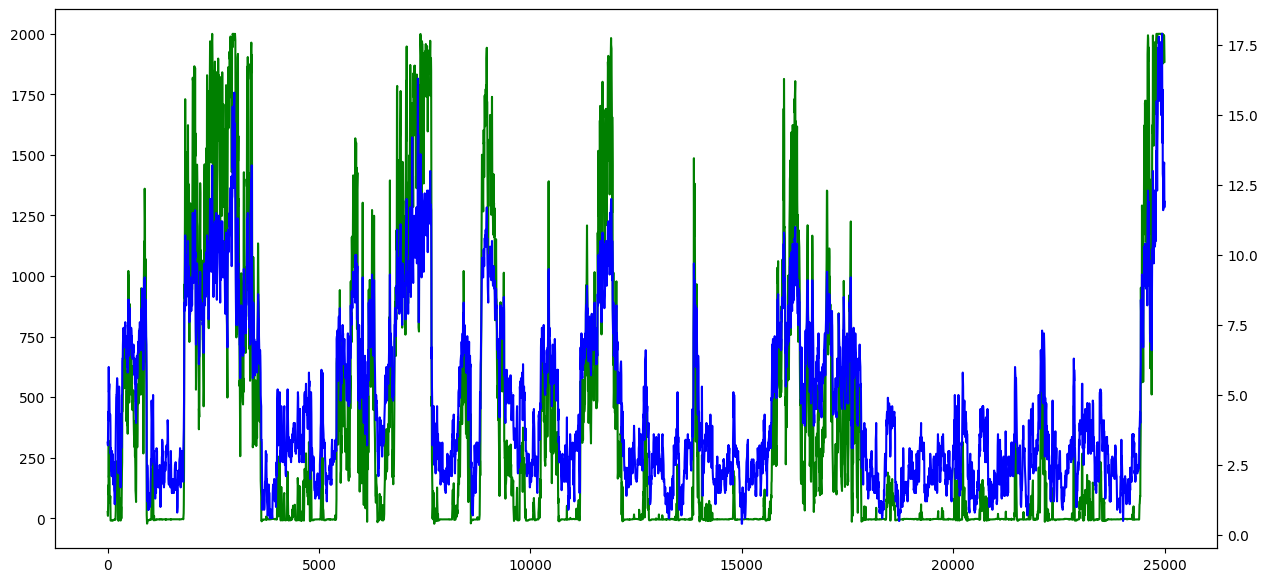

In [417]:
values1=T1sig.Grd_Prod_Pwr_Avg[:5000]
values2=T1sig.Amb_WindSpeed_Avg[:5000]

fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

In [418]:
t_curve=pd.read_csv('../1-input/6-Power_curve.csv', sep=',')

t_curve

,wind_speed,Power
0,4.0,89
1,4.5,142
2,5.0,204
3,5.5,279
4,6.0,368
5,6.5,470
6,7.0,594
7,7.5,736
8,8.0,896
9,8.5,1069


In [419]:
t_curve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wind_speed  43 non-null     float64
 1   Power       43 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes


In [420]:
from scipy.interpolate import interp1d

In [421]:
f1 = interp1d(t_curve.wind_speed, t_curve.Power ,kind = 'linear')
f2 = interp1d(t_curve.wind_speed, t_curve.Power , kind = 'cubic')

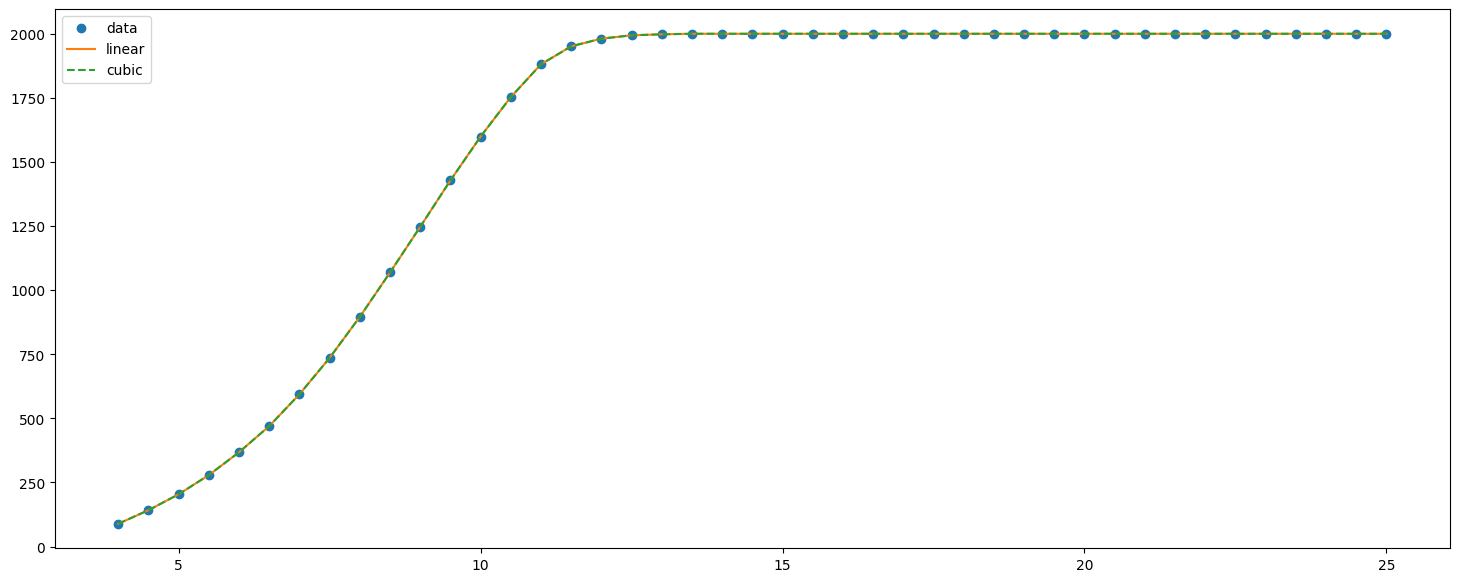

In [422]:

xnew = np.linspace(4, 25,43)

plt.figure(figsize=(18,7))

plt.plot(t_curve.wind_speed, t_curve.Power, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')

plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')

plt.show()

In [423]:
Grd_Prod_Pwr_theo=[]
 
for value in T1sig.Amb_WindSpeed_Avg:
    
    if value<4 or value>25:
        res=0
    
    else:
        res=f2(value)

    Grd_Prod_Pwr_theo.append(round(float(res),4))


In [424]:
T1=T1sig[['Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','Amb_WindDir_Abs_Avg']].reset_index(drop=True)

T1.Amb_WindSpeed_Avg.max(), T1.Amb_WindSpeed_Avg.min(), T1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87146 entries, 0 to 87145
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grd_Prod_Pwr_Avg     87146 non-null  float64
 1   Amb_WindSpeed_Avg    87146 non-null  float64
 2   Amb_WindDir_Abs_Avg  87146 non-null  float64
dtypes: float64(3)
memory usage: 2.0 MB


(24.8, 0.4, None)

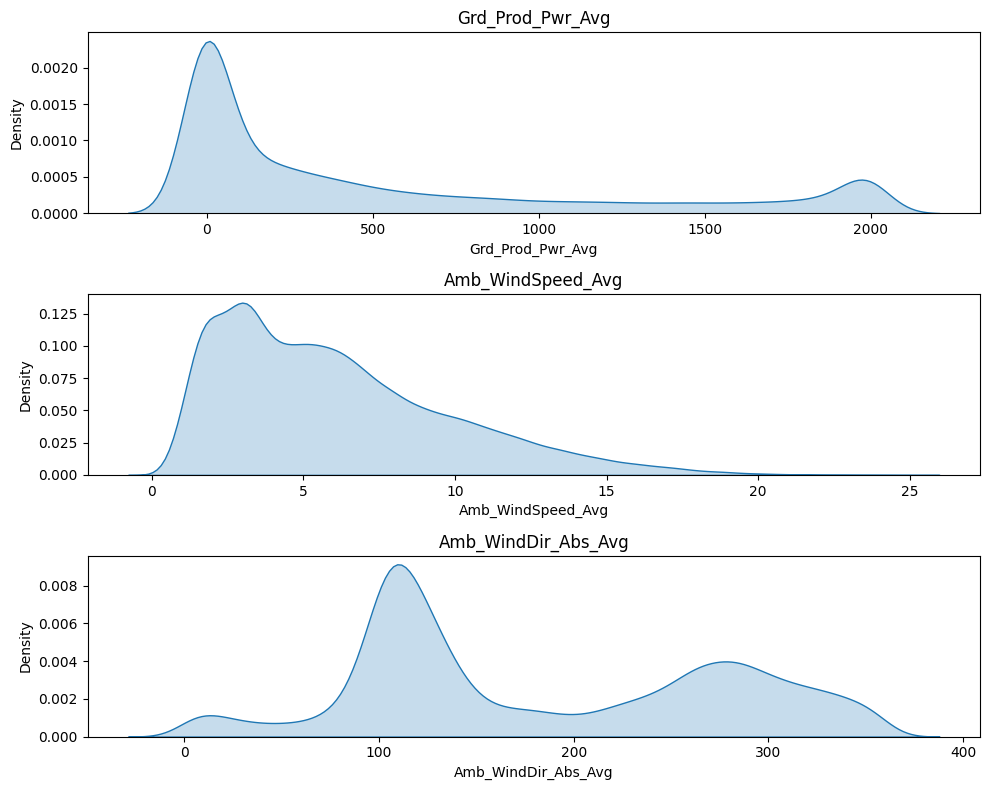

In [425]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(1, 4, 1):
    plt.subplot(3,1,i)
    sns.kdeplot(T1.iloc[:,i-1], shade=True)
    plt.title(T1.columns[i-1])
plt.tight_layout()
plt.show()

In [426]:
T1=T1sig[['Timestamp','Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','Amb_WindDir_Abs_Avg']].reset_index(drop=True)
T1['Grd_Prod_Pwr_theo']=Grd_Prod_Pwr_theo
T1['loss_value']=T1['Grd_Prod_Pwr_theo']- T1['Grd_Prod_Pwr_Avg']
T1["mean_Direction"]=T1["Amb_WindDir_Abs_Avg"].apply(mean_direction)
T1['loss_perc']=T1['loss_value']*100/T1['Grd_Prod_Pwr_theo']
T1['Energy_gen']=T1['Grd_Prod_Pwr_Avg']*3600/60
T1["Direction"]=T1["mean_Direction"].apply(find_direction)
T1['Timestamp'] = pd.to_datetime(T1['Timestamp'])
T1['Month']=T1["Timestamp"].dt.month

T1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87146 entries, 0 to 87145
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            87146 non-null  datetime64[ns]
 1   Grd_Prod_Pwr_Avg     87146 non-null  float64       
 2   Amb_WindSpeed_Avg    87146 non-null  float64       
 3   Amb_WindDir_Abs_Avg  87146 non-null  float64       
 4   Grd_Prod_Pwr_theo    87146 non-null  float64       
 5   loss_value           87146 non-null  float64       
 6   mean_Direction       87146 non-null  int64         
 7   loss_perc            87138 non-null  float64       
 8   Energy_gen           87146 non-null  float64       
 9   Direction            87146 non-null  object        
 10  Month                87146 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 7.3+ MB


In [427]:
T1

,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_WindDir_Abs_Avg,Grd_Prod_Pwr_theo,loss_value,mean_Direction,loss_perc,Energy_gen,Direction,Month
0,2016-01-01 00:00:00,26.2,3.3,206.1,0.0000,-26.2000,210,-inf,1572.0,SSW,1
1,2016-01-01 00:10:00,10.1,3.2,217.4,0.0000,-10.1000,210,-inf,606.0,SSW,1
2,2016-01-01 00:20:00,59.0,4.3,207.4,119.9661,60.9661,210,50.819440,3540.0,SSW,1
3,2016-01-01 00:30:00,135.7,4.4,232.0,130.8206,-4.8794,240,-3.729841,8142.0,SWW,1
4,2016-01-01 00:40:00,98.9,4.1,245.6,99.0909,0.1909,240,0.192651,5934.0,SWW,1
...,...,...,...,...,...,...,...,...,...,...,...
87141,2017-08-31 23:20:00,110.5,4.3,119.9,119.9661,9.4661,120,7.890646,6630.0,SEE,8
87142,2017-08-31 23:30:00,91.8,4.1,115.7,99.0909,7.2909,120,7.357790,5508.0,SEE,8
87143,2017-08-31 23:40:00,67.5,4.0,109.3,89.0000,21.5000,120,24.157303,4050.0,SEE,8
87144,2017-08-31 23:50:00,88.9,4.4,106.7,130.8206,41.9206,120,32.044342,5334.0,SEE,8


In [428]:
T1.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

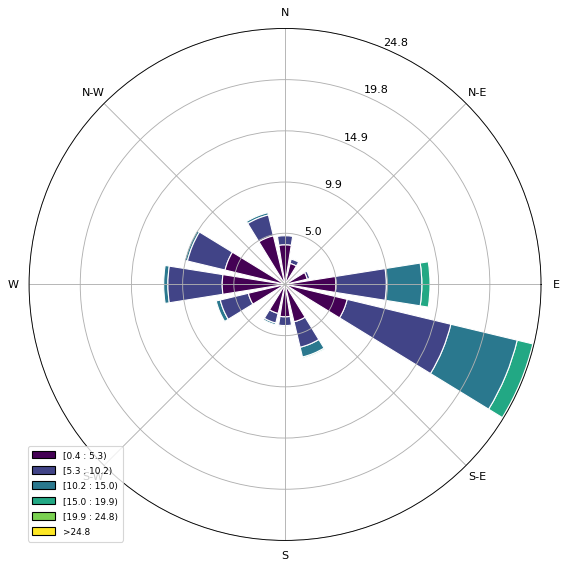

In [429]:
ax = WindroseAxes.from_ax()
ax.bar(T1['mean_Direction'], T1['Amb_WindSpeed_Avg'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

In [430]:
T1.loc[T1.Amb_WindSpeed_Avg==24.7]

,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_WindDir_Abs_Avg,Grd_Prod_Pwr_theo,loss_value,mean_Direction,loss_perc,Energy_gen,Direction,Month


In [431]:
curveT1=T1.loc[T1["Amb_WindSpeed_Avg"]>=4].groupby("Amb_WindSpeed_Avg").median().reset_index()
curveT1["suma"]=[len(T1["Amb_WindSpeed_Avg"][T1["Amb_WindSpeed_Avg"]==i]) for i in curveT1["Amb_WindSpeed_Avg"]]
curveT1=curveT1.loc[curveT1["suma"]>4]

Text(0, 0.5, 'Power (kW)')

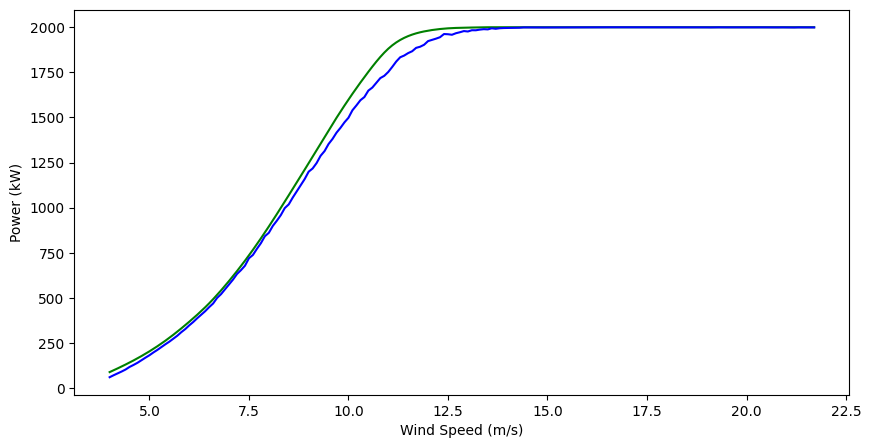

In [432]:
values1=curveT1.Grd_Prod_Pwr_Avg
values2=curveT1.Grd_Prod_Pwr_theo
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(curveT1["Amb_WindSpeed_Avg"],values2, 'g-')
ax1.plot(curveT1["Amb_WindSpeed_Avg"],values1, 'b-')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")

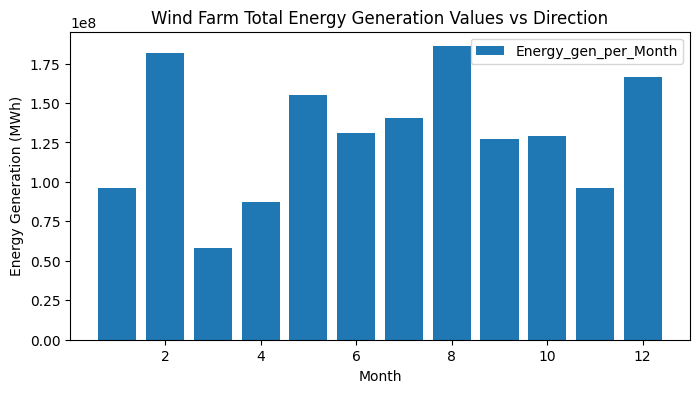

In [433]:
PowerT1=T1.loc[T1["Timestamp"].dt.year==2016].groupby("Month").sum().reset_index()
PowerT1

fig = plt.figure(figsize=(8,4))
plt.bar(PowerT1["Month"],PowerT1["Energy_gen"],label="Energy_gen_per_Month")
plt.xlabel("Month")
plt.ylabel("Energy Generation (MWh)")
plt.title("Wind Farm Total Energy Generation Values vs Direction")
plt.legend()
plt.show()

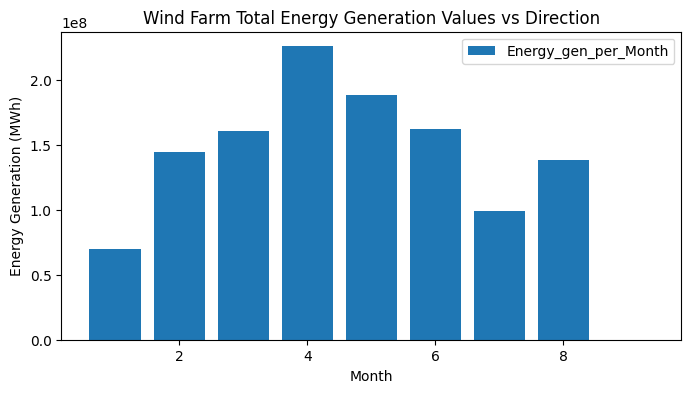

In [434]:
PowerT1_2=T1.loc[T1["Timestamp"].dt.year==2017].groupby("Month").sum().reset_index()

fig = plt.figure(figsize=(8,4))
plt.bar(PowerT1_2["Month"],PowerT1_2["Energy_gen"],label="Energy_gen_per_Month")
plt.xlabel("Month")
plt.ylabel("Energy Generation (MWh)")
plt.title("Wind Farm Total Energy Generation Values vs Direction")
plt.legend()
plt.show()